# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Users\mutua\AppData\Local\Temp\ipykernel_10852\3495510845.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Obtain the data file

In [3]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [4]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [5]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [6]:
df.shape

(50, 5)

In [7]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [8]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [9]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [10]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [11]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [12]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [13]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [14]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [15]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [16]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [17]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [18]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [19]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [20]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)


***Plot results***

tn: 3.00
fp: 0.00
fn: 6.00
tp: 0.00
Specificity: 1.00
sensitivity: 0.00
Accuracy: 0.3333


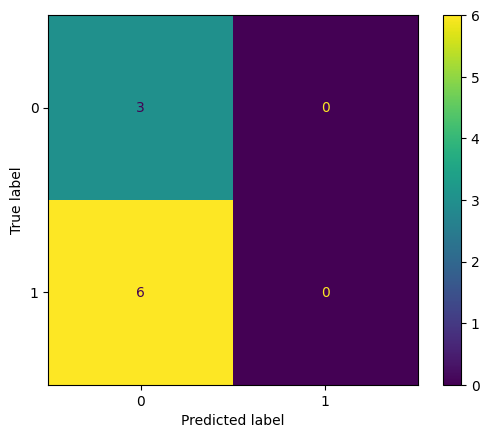

In [33]:
from sklearn import metrics
df_confusion = metrics.confusion_matrix(y_test,predictions)
tn, fp, fn, tp = df_confusion.ravel()
print(f"tn: {tn:.2f}")
print(f"fp: {fp:.2f}")
print(f"fn: {fn:.2f}")
print(f"tp: {tp:.2f}")

specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

sensitivity = tp / (tp + fn)
print(f"sensitivity: {sensitivity:.2f}")

print(f"Accuracy: {accuracy}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = df_confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

### Sigmoid Function

In [54]:
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))


### Ridge

In [55]:
def RidgeLogisticLoss(X, y, w, lambda_):
    """Compute the logistic loss with L2 regularization (Ridge)."""
    predictions = sigmoid(X @ w)
    log_loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    l2_penalty = lambda_ * np.linalg.norm(w[1:], 2)**2  # Exclude bias term
    return log_loss + l2_penalty

def RidgeLogisticGradient(X, y, w, lambda_):
    """Compute the gradient of the logistic loss with L2 regularization (Ridge)."""
    predictions = sigmoid(X @ w)
    grad_log_loss = X.T @ (predictions - y) / X.shape[0]
    grad_l2 = lambda_ * np.concatenate(([0], w[1:]))  # Exclude bias term
    return grad_log_loss + grad_l2

def RidgeLogisticGD(X, y, lambda_=0.001, lr=0.1, max_iter=5000, tol=1e-6):
    """Gradient descent for Ridge logistic regression."""
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    loss_history = []
    max_loss_iter = 0  # Initialize iteration for max loss
    max_loss_value = float('inf')  # Initialize max loss value

    for iter in range(max_iter):
        loss = RidgeLogisticLoss(X, y, w, lambda_)
        grad = RidgeLogisticGradient(X, y, w, lambda_)
        w -= lr * grad
        loss_history.append(loss)

        # Convergence check
        if iter > 0 and abs(loss_history[-2] - loss_history[-1]) < tol and max_loss_iter==0:
            if loss < max_loss_value:
                max_loss_value = loss
            print(f"Ridge converged after {iter} iterations.")
            max_loss_iter = iter
            break

    return w, loss_history, (max_loss_iter, max_loss_value)



### Lasso

In [56]:
def LassoLogisticLoss(X, y, w, lambda_):
    """Compute the logistic loss with L1 regularization (Lasso)."""
    predictions = sigmoid(X @ w)
    log_loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    l1_penalty = lambda_ * np.linalg.norm(w, 1)
    return log_loss + l1_penalty

def LassoLogisticGradient(X, y, w, lambda_):
    """Compute the gradient of the logistic loss with L1 regularization (Lasso)."""
    predictions = sigmoid(X @ w)
    grad_log_loss = X.T @ (predictions - y) / X.shape[0]
    grad_l1 = lambda_ * np.sign(w)  # Subgradient of L1 penalty
    return grad_log_loss + grad_l1

def LassoLogisticGD(X, y, lambda_=0.001, lr=1, max_iter=5000, tol=1e-6):
    """Gradient descent for Lasso logistic regression."""
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    loss_history = []
    max_loss_iter = 0  # Initialize iteration for max loss
    max_loss_value = float('inf')  # Initialize max loss value

    for iter in range(max_iter):
        loss = LassoLogisticLoss(X, y, w, lambda_)
        grad = LassoLogisticGradient(X, y, w, lambda_)
        w -= lr * grad
        loss_history.append(loss)

        # Convergence check
        if iter > 0 and abs(loss_history[-2] - loss_history[-1]) < tol and max_loss_iter==0:
            if loss < max_loss_value:
                max_loss_value = loss
            print(f"Lasso converged after {iter} iterations.")
            max_loss_iter = iter

    return w, loss_history, (max_loss_iter, max_loss_value)

### Elastic Net

In [57]:
def ElasticNetLogisticLoss(X, y, w, lambda_, alpha):
    """Compute the logistic loss with Elastic Net regularization."""
    predictions = sigmoid(X @ w)
    log_loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    l1_penalty = alpha * np.linalg.norm(w, 1)
    l2_penalty = (1 - alpha) * np.linalg.norm(w, 2)**2
    return log_loss + lambda_ * (l1_penalty + l2_penalty)

def ElasticNetLogisticGradient(X, y, w, lambda_, alpha):
    """Compute the gradient of the logistic loss with Elastic Net regularization."""
    predictions = sigmoid(X @ w)
    grad_log_loss = X.T @ (predictions - y) / X.shape[0]
    grad_l1 = lambda_ * alpha * np.sign(w)  # Subgradient for L1 penalty
    grad_l2 = lambda_ * (1 - alpha) * w     # Gradient for L2 penalty
    return grad_log_loss + grad_l1 + grad_l2

def ElasticNetLogisticGD(X, y, lambda_=0.001, alpha=0.5, lr=0.1, max_iter=5000, tol=1e-6):
    """Gradient descent for Elastic Net logistic regression."""
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    loss_history = []
    max_loss_iter = 0  # Initialize iteration for max loss
    max_loss_value = float('inf')  # Initialize max loss value

    for iter in range(max_iter):
        loss = ElasticNetLogisticLoss(X, y, w, lambda_, alpha)
        grad = ElasticNetLogisticGradient(X, y, w, lambda_, alpha)
        w -= lr * grad
        loss_history.append(loss)

        # Convergence check
        if iter > 0 and abs(loss_history[-2] - loss_history[-1]) < tol and max_loss_iter==0:
            if loss < max_loss_value:
                max_loss_value = loss
            print(f"ElasticNet converged after {iter} iterations.")
            max_loss_iter = iter

    return w, loss_history, (max_loss_iter, max_loss_value)


### Running Models

In [58]:
Regularizations = [RidgeLogisticGD, LassoLogisticGD, ElasticNetLogisticGD]
weights = {}
loss = {}
max_loss_coords = {}
for r in Regularizations:
    print(f"Running {r.__name__}...")
    if r.__name__ == "LassoLogisticGD":
        weights[r.__name__], loss[r.__name__], max_loss_coords[r.__name__] = r(X_train, y_train)
    else:
        # Assuming Ridge and ElasticNet versions also have max_loss_coords functionality
        weights[r.__name__], loss[r.__name__], max_loss_coords[r.__name__] = r(X_train, y_train)
    
    print(f"Maximum loss for {r.__name__}: Iteration {max_loss_coords[r.__name__][0]}, Loss {max_loss_coords[r.__name__][1]:.6f}\n")


Running RidgeLogisticGD...
Ridge converged after 4876 iterations.
Maximum loss for RidgeLogisticGD: Iteration 4876, Loss 0.618846

Running LassoLogisticGD...
Lasso converged after 1645 iterations.
Maximum loss for LassoLogisticGD: Iteration 1645, Loss 0.608894

Running ElasticNetLogisticGD...
ElasticNet converged after 4473 iterations.
Maximum loss for ElasticNetLogisticGD: Iteration 4473, Loss 0.625231



### Plotting Iteration Vs Loss

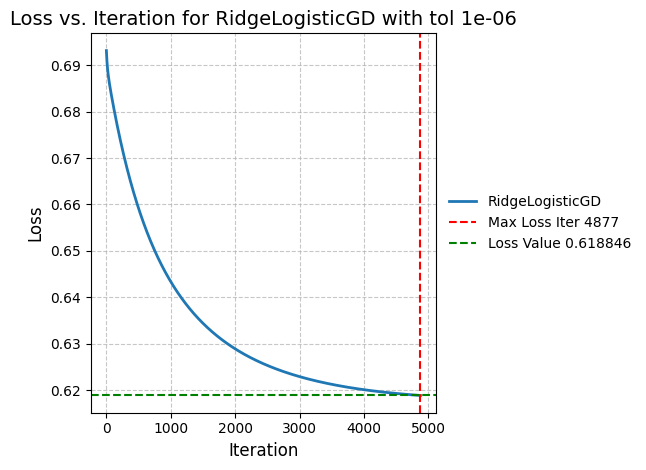

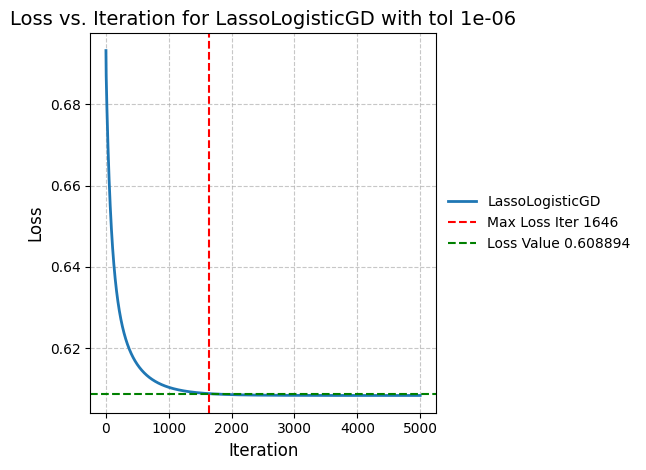

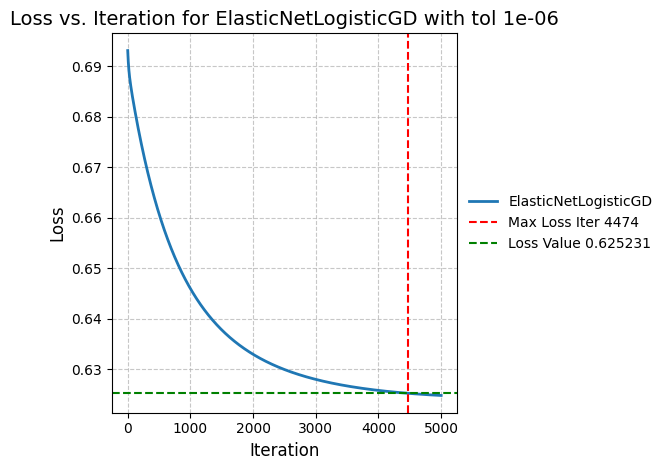

In [59]:
for r in Regularizations:
    plt.figure()  # Create a new figure for each plot
    plt.plot(range(1, len(loss[r.__name__]) + 1), loss[r.__name__], 
             label=r.__name__, linewidth=2, markevery=100)

    # Get the max loss iteration and value from the result
    max_loss_iter, max_loss_value = max_loss_coords[r.__name__]

    # Plot vertical line at the iteration of max loss
    plt.axvline(x=max_loss_iter + 1, color='red', linestyle='--', label=f"Max Loss Iter {max_loss_iter + 1}")
    # Plot horizontal line at the value of max loss
    plt.axhline(y=max_loss_value, color='green', linestyle='--', label=f"Loss Value {max_loss_value:.6f}")

    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, fontsize=10)
    plt.title(f"Loss vs. Iteration for {r.__name__} with tol {10e-7}", fontsize=14)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    # plt.xscale("log")  # Set x-axis to logarithmic scale if needed
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### Model by SKLEARN

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [61]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



Repeat the previous task for regularized logistic regression and compare the results.

In [62]:
from sklearn.metrics import classification_report

# Function to predict classes using learned weights
def predict(X, w, threshold=0.5):
    """
    Predict class labels based on the logistic regression model.
    X: Feature matrix (n_samples, n_features)
    w: Coefficients (n_features,)
    threshold: Probability threshold for classification (default 0.5)
    """
    probabilities = sigmoid(X @ w)  # Compute probabilities
    return (probabilities >= threshold).astype(int)  # Convert to class labels

for r in Regularizations:
    y_pred = predict(X_test, weights[r.__name__])
    
    print(f"Model: {r.__name__}")
    print(classification_report(y_test, y_pred, target_names=['California', 'Florida'], zero_division=0))


Model: RidgeLogisticGD
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35         9

Model: LassoLogisticGD
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35         9

Model: ElasticNetLogisticGD
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9


***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [ ]:
def roc_curve(y_true, y_scores):
    # Sort scores and corresponding true labels by descending score
    thresholds = np.sort(y_scores)[::-1]
    tpr = []  # True Positive Rate
    fpr = []  # False Positive Rate
    
    for thresh in thresholds:
        # Predicted labels at current threshold
        y_pred = (y_scores >= thresh).astype(int)
        
        # Confusion matrix components
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        
        # Compute TPR and FPR
        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    
    return fpr, tpr, thresholds

In [64]:
def plot_roc_curve_Rugularised(fpr, tpr, model_name):
    """
    Parameters:
        fpr (list): False Positive Rates.
        tpr (list): True Positive Rates.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {model_name.__name__}")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [75]:
def plot_roc_curve_not_Rugularised(fpr, tpr, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {model_name}")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

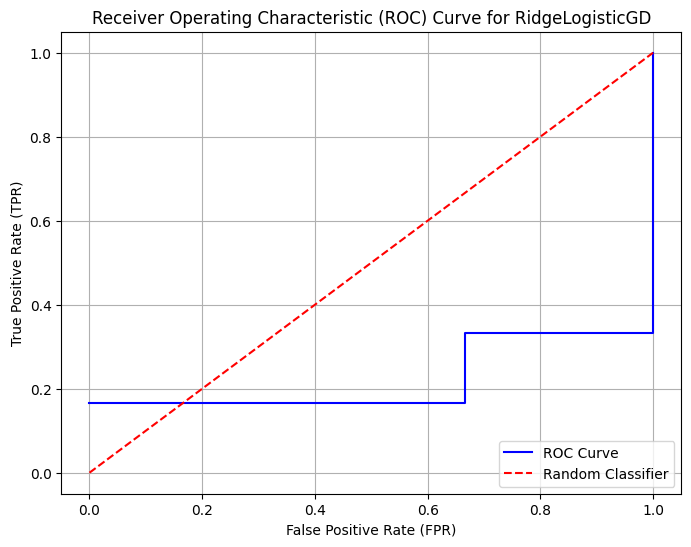

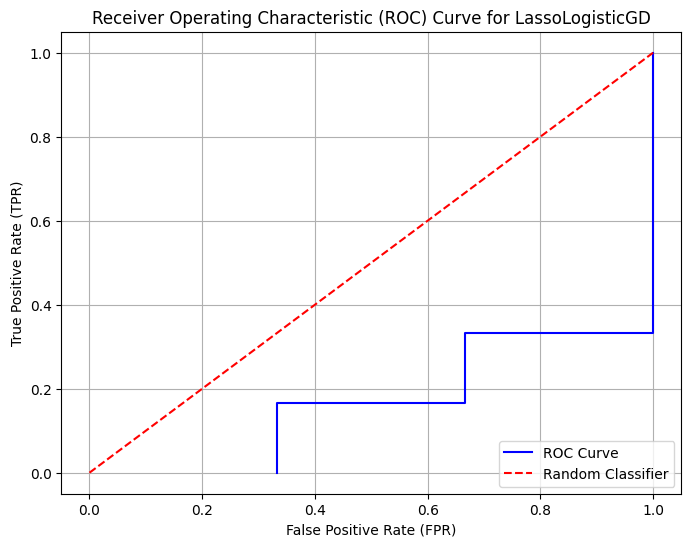

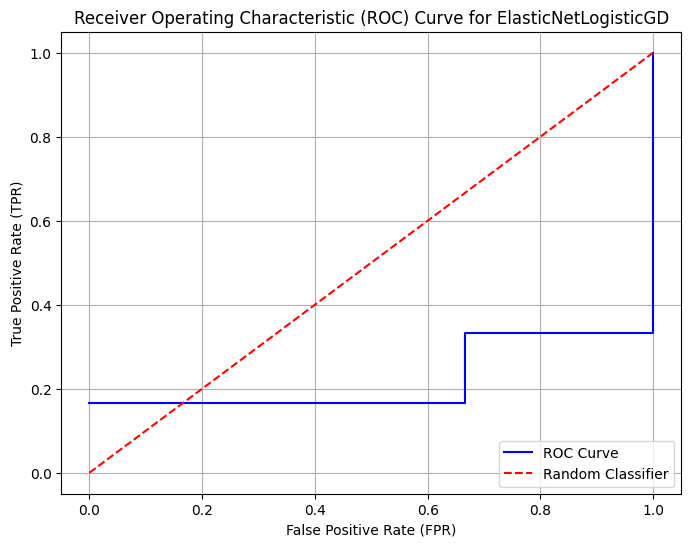

In [ ]:
for r in Regularizations:
    y_scores = sigmoid(X_test @ weights[r.__name__])
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve_Rugularised(fpr, tpr,r)

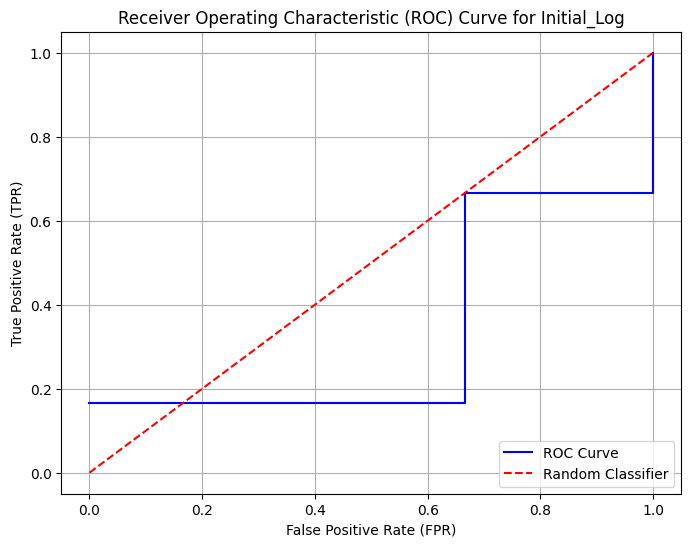

In [ ]:
y_scores = sigmoid(X_test @ LR.coef_[0])
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc_curve_not_Rugularised(fpr, tpr, "Initial_Log")